In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('/content/train.csv')
print(df.head())


   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         0         1         1         1         1         0   
1   2         0         0         0         0         0         0         0   
2   3         1         1         1         1         1         1         0   
3   4         0         0         0         1         0         0         0   
4   5         0         0         0         0         1         0         0   

   A8_Score  A9_Score  ...  gender       ethnicity jaundice austim  \
0         1         1  ...       f  White-European       no     no   
1         0         0  ...       f     South Asian       no     no   
2         0         1  ...       f  White-European       no     no   
3         0         0  ...       f     South Asian       no     no   
4         0         1  ...       m           Black       no    yes   

    contry_of_res used_app_before     result     age_desc  relation Class/ASD  
0   United States       

In [3]:
df.shape


(800, 22)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,800.0,400.500000,231.084400,1.000000,200.750000,400.500000,600.250000,800.000000
A1_Score,800.0,0.582500,0.493455,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.286250,0.452290,0.000000,0.000000,0.000000,1.000000,1.000000
A3_Score,800.0,0.321250,0.467249,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.457500,0.498502,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.208750,0.406670,0.000000,0.000000,0.000000,0.000000,1.000000
A7_Score,800.0,0.273750,0.446161,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.717500,0.450497,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.316250,0.465303,0.000000,0.000000,0.000000,1.000000,1.000000


In [6]:
df['ethnicity'].value_counts()


White-European     211
?                  151
Asian              134
Middle Eastern     116
Black               45
Latino              44
South Asian         35
Others              24
Pasifika            18
Hispanic            16
Turkish              4
others               2
Name: ethnicity, dtype: int64

In [7]:
df['relation'].value_counts()


Self                        617
?                            77
Parent                       49
Relative                     43
Health care professional      7
Others                        7
Name: relation, dtype: int64

In [8]:
df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})


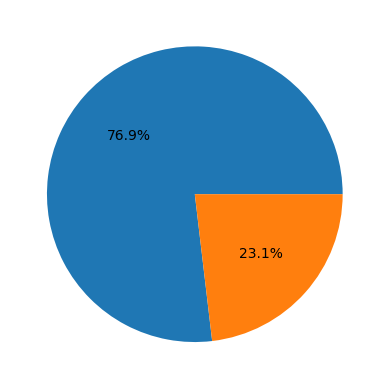

In [9]:
plt.pie(df['Class/ASD'].value_counts().values, autopct='%1.1f%%')
plt.show()


In [20]:
ints = []
objects = []
floats = []

for col in df.columns:
  if df[col].dtype == int:
    ints.append(col)
  elif df[col].dtype == object:
    objects.append(col)
  else:
    floats.append(col)


In [21]:
ints.remove('ID')
ints.remove('Class/ASD')


ValueError: ignored

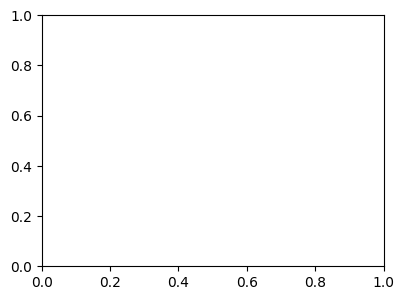

In [29]:
plt.subplots(figsize=(15,15))

for i, col in enumerate(ints):
  plt.subplot(4,3,i+1)
  sb.countplot(df[col], hue=df['Class/ASD'])
plt.tight_layout()
plt.show()


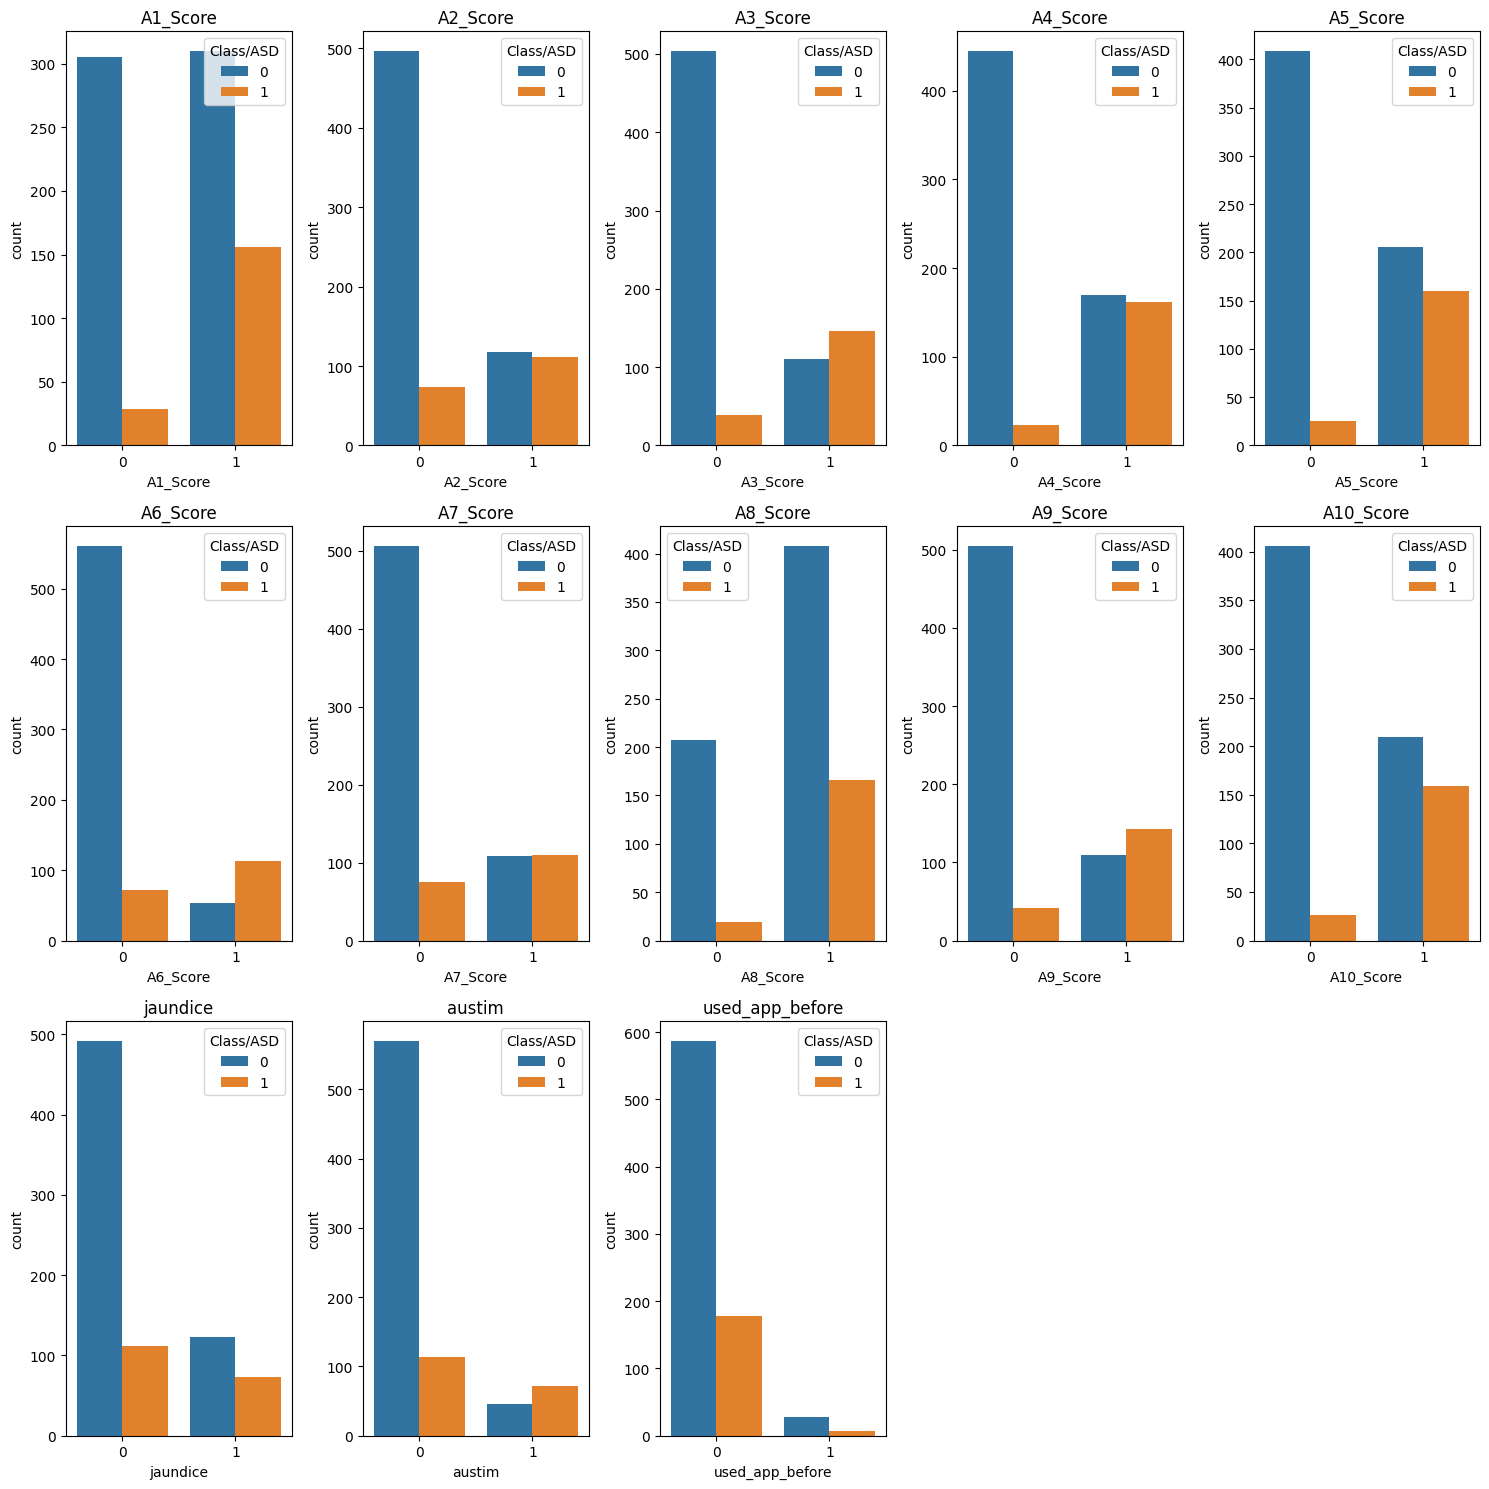

In [28]:
import seaborn as sb
import matplotlib.pyplot as plt
import math

# Assuming you have a list of integer columns to plot (ints)
# For example:


# Assuming 'Class/ASD' is the target variable, and 'df' is your DataFrame

# Calculate the number of rows and columns based on the number of columns you want to plot
n_cols = 5  # Number of columns in the grid
n_rows = math.ceil(len(ints) / n_cols)  # Calculate the number of rows based on the number of columns

plt.figure(figsize=(15, 15))

# Create a grid of count plots for each integer column
for i, col in enumerate(ints):
    plt.subplot(n_rows, n_cols, i + 1)
    ax = sb.countplot(x=col, data=df, hue='Class/ASD', ax=plt.gca())
    ax.set_title(col)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


In [23]:
plt.figure(figsize=(15,5))
sb.countplot(data=df, x='country_of_res', hue='Class/ASD')
plt.xticks(rotation=90)
plt.show()


ValueError: ignored

<Figure size 1500x500 with 0 Axes>

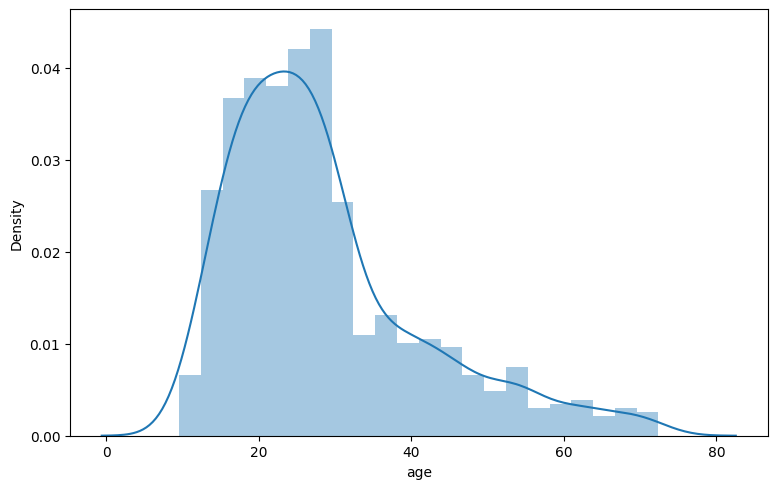

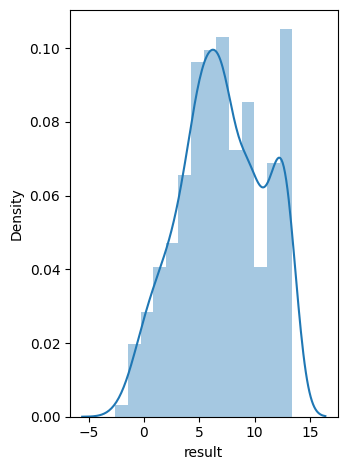

In [31]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.distplot(df[col])
  plt.tight_layout()
  plt.show()


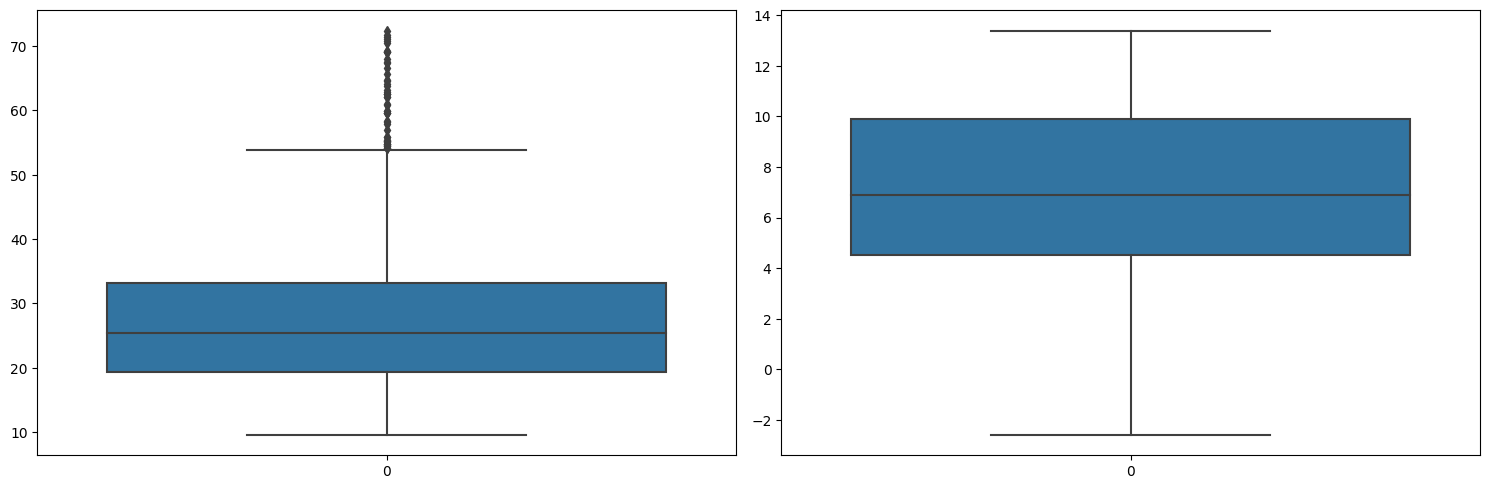

In [34]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()


In [35]:
df = df[df['result']>-5]
df.shape


(800, 23)

In [36]:
# This functions make groups by taking
# the age as a parameter
def convertAge(age):
	if age < 4:
		return 'Toddler'
	elif age < 12:
		return 'Kid'
	elif age < 18:
		return 'Teenager'
	elif age < 40:
		return 'Young'
	else:
		return 'Senior'

df['ageGroup'] = df['age'].apply(convertAge)


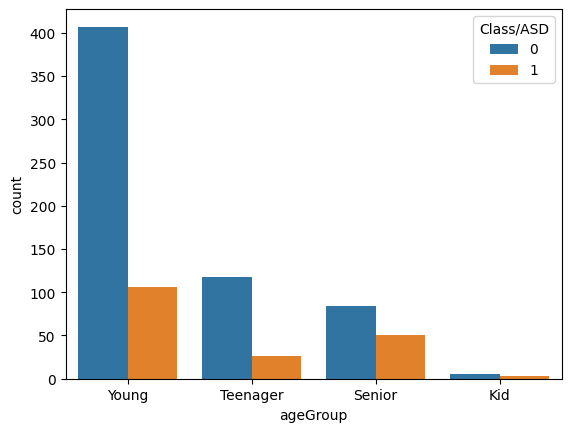

In [37]:
sb.countplot(x=df['ageGroup'], hue=df['Class/ASD'])
plt.show()


In [39]:
def add_feature(data):

# Creating a column with all values zero
  data['sum_score'] = 0
  for col in data.loc[:,'A1_Score':'A10_Score'].columns:

    # Updating the 'sum_score' value with scores
    # from A1 to A10
    data['sum_score'] += data[col]

  # Creating a random data using the below three columns
  data['ind'] = data['austim'] + data['used_app_before'] + data['jaundice']

  return data

df = add_feature(df)


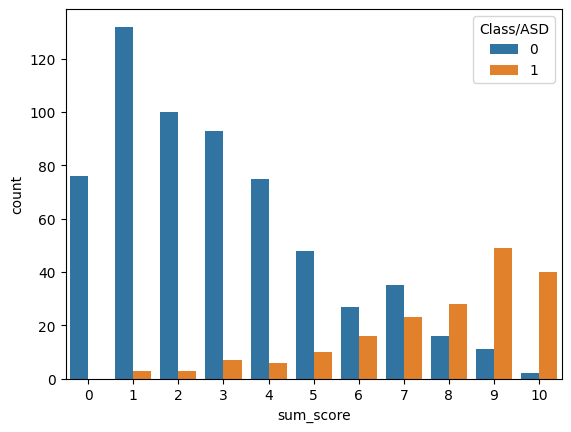

In [40]:
sb.countplot(x=df['sum_score'], hue=df['Class/ASD'])
plt.show()


In [41]:
# Applying log transformations to remove the skewness of the data.
df['age'] = df['age'].apply(lambda x: np.log(x))


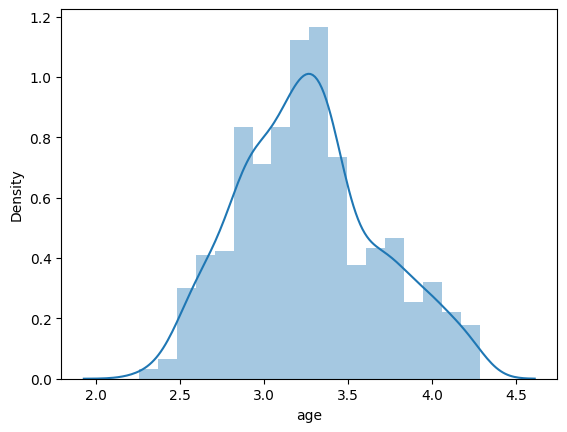

In [42]:
sb.distplot(df['age'])
plt.show()


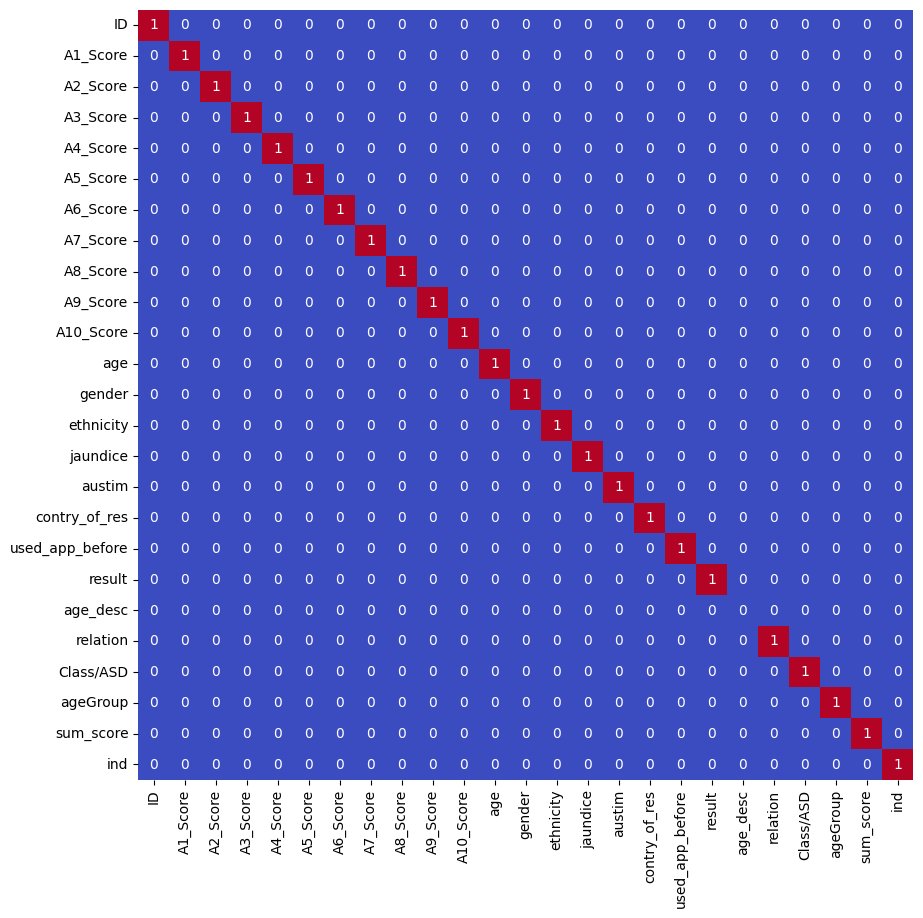

In [46]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sb
import matplotlib.pyplot as plt

def encode_labels(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
    return data

# Assuming you have a DataFrame 'df'
df = encode_labels(df)

# Create a correlation matrix
correlation_matrix = df.corr()

# Set a threshold for correlation values to highlight
threshold = 0.8  # You can adjust this threshold as needed

# Create a mask to hide the upper triangle of the correlation matrix
mask = correlation_matrix.where(abs(correlation_matrix) > threshold, 0)

# Making a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 10))
sb.heatmap(mask, annot=True, cbar=False, cmap='coolwarm')  # Adjust the colormap as needed
plt.show()



In [47]:
removal = ['ID', 'age_desc', 'used_app_before', 'austim']
features = df.drop(removal + ['Class/ASD'], axis=1)
target = df['Class/ASD']


In [48]:
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.2, random_state=10)

# As the data was highly imbalanced we will balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
X, Y = ros.fit_resample(X_train,Y_train)
X.shape, Y.shape


((992, 20), (992,))

In [49]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)


In [50]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for model in models:
  model.fit(X, Y)

  print(f'{model} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val)))
  print()


LogisticRegression() : 
Training Accuracy :  0.845766129032258
Validation Accuracy :  0.8348022135683542

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.836441893830703

SVC() : 
Training Accuracy :  0.9203629032258065
Validation Accura